In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing and cleaning the data
train_data = pd.read_csv('data/DBS.csv', sep=';')
test_data = pd.read_csv('data/DBS_2020.csv', sep=';')

In [3]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [4]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

In [5]:
# Data normalization with sklearn
from sklearn import preprocessing
standardized_X = preprocessing.scale(X_test)
df = pd.DataFrame(standardized_X)

In [24]:
# Transform the dataset
# SMOTE (synthetic minority oversampling technique)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 

# fit_sample was renamed to fit_resample in v0.4.
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) 

In [57]:
# regressão logística usando sklearn

from sklearn.linear_model import LogisticRegression

#lr1 = LogisticRegression(fit_intercept = False)
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)

print(lr1.coef_)
print(lr1.intercept_)

[[0.00171531 0.10990767 0.04651446]]
[-5.45030527]


In [60]:
# regressão logística usando statsmodels  

import statsmodels.api as sm
X_train_res_com_intercepto = sm.add_constant(X_train_res)
log_reg = sm.Logit(y_train_res, X_train_res_com_intercepto).fit()
log_reg.params

Optimization terminated successfully.
         Current function value: 0.419387
         Iterations 7


array([-5.45131013e+00,  1.71500060e-03,  1.09935111e-01,  4.65278269e-02])

In [61]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  420
Model:                          Logit   Df Residuals:                      416
Method:                           MLE   Df Model:                            3
Date:                Thu, 28 Apr 2022   Pseudo R-squ.:                  0.3950
Time:                        01:49:18   Log-Likelihood:                -176.14
converged:                       True   LL-Null:                       -291.12
Covariance Type:            nonrobust   LLR p-value:                 1.412e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4513      0.627     -8.692      0.000      -6.681      -4.222
x1             0.0017      0.001      2.836      0.005       0.001       0.003
x2             0.1099      0.015      7.195      0.000       0.080       0.140
x3             0.0465      0.021      2.264      0.024       0.006       0.087
==============================================================================
"""

Mean ROC AUC: 0.969


In [50]:
# Predictions sklearn

yhat = lr1.predict(X_test)
yhat_prob = lr1.predict_proba(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[12,  2],
       [ 2, 44]])

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.96      0.96      0.96        46

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60



In [74]:
X_test_com_intercepto = sm.add_constant(X_test)
( log_reg.predict(X_test_com_intercepto)>0.5 ).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(lr1, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.979


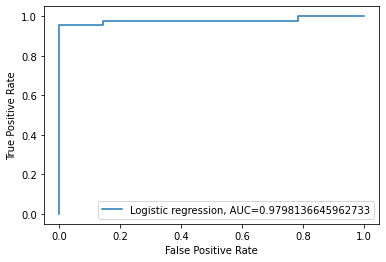

In [77]:
from sklearn import metrics
y_pred_proba = lr1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))
plt.legend(loc=4)
plt.show()